In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import optimize 

We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. Task:

fitting it to the periodic function
plot the fit Data Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [4]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Min and max temperature')

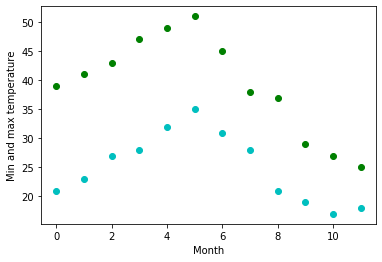

In [5]:
months = np.arange(12)
plt.plot(months, temp_max, 'go')
plt.plot(months, temp_min, 'co')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [6]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

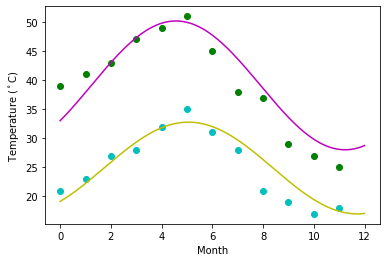

In [7]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [10]:
titanic = pd.read_csv("https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv",
                           sep='\t')

In [11]:
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


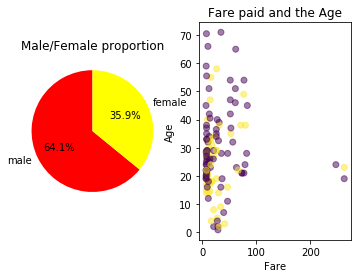

In [23]:
#1. Create a pie chart presenting the male/female proportion

count=titanic['Sex'].value_counts()
colors = ['red', 'yellow']
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=90,autopct='%.1f%%')
ax1.set_title('Male/Female proportion')


#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

ax2.set_xlabel('Fare')
ax2.set_ylabel('Age')
ax2.set_title('Fare paid and the Age')
ax2.scatter(titanic['Fare'], titanic['Age'], c= pd.factorize(titanic['Sex'])[0], alpha=0.5)